# 자동 리로드 관련 된 초기 설정들

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# numpy, pandas, seaborn 등을 호출
# matplotlib, seaborn 은 그래프를 이쁘게 뽑아주는 것이다. 

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

# default 설정
단순하게 그림 스타일과 , 어떻게 표현할지에 대한 설명. 

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

# 학습 데이터 로드
train.csv 만 뽑아서 건들여 볼 것이다. 
파일들의 경로를 찾아서 trn_file 이라는 변수에 넣은 것이다. 

In [4]:
data_dir=Path('./Dacon')
trn_file = data_dir / 'train.csv'
seed = 42

trn 이라는 변수에다가 판다스를 이용해서 csv 파일을 읽어오는데, 이때 첫 column =0 으로 설정하고.
trn.head 를 통해서 첫 5 개만 뽑아 내는 과정을 설명. 

In [5]:
trn=pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


# 여기에서 선형 관계 를 표현하기 좋은 변수들이 U ,dered_u 여서 이 두개를 선정하였다. 
# 왜 선형 회귀를 사용하였을까? 
모델이 선형이 아니라면, 학습이 잘 안된다. 그리고 u, deredu 도 임의 로 추출을 한 것이다. 
airmass,u 얘네를 뽑아 내면, 전혀 선형 적으로 표현이 안되기 때문에 linear regression 을 사용하기에는 굉장히 안좋다. 
# EDA 를 통해서 우리는 어떤 모델을 사용할지 확인을 할수도 있지만, 선형 회귀는 가정이 몇개 있다. 1. 선형 관계에 있어야된다. 2. 변수들 간에 independent 해야된다. 
# pandas notebook 을 보면, airmassu,z 는 굉장히 연관성이 높아서 independent 하지 않기 때문에 사용이 불가능하다. 
# 대회 나가면 알고리즘은 다 미리 정해져 있다. boost, neural network. 
# 해석이 필요한 모델링은, 어떤 변수 때문에 어떤 결과가 나왔다, 이런 상황에서는 선형 회귀, decision tree 두개의 단순한 것을 사용한다.
# 업무의 목적, 데이터 모델링으 ㅣ목적으로 알고리즘이 정해 지고, 그 다음에 알고리즘에 필요한 가정이 성립하는지 확인하기 위해서 EDA 를 하는 것이다. 
# 알고리즘을 선택한 뒤에 증명을 위해 EDA 를 한다. 


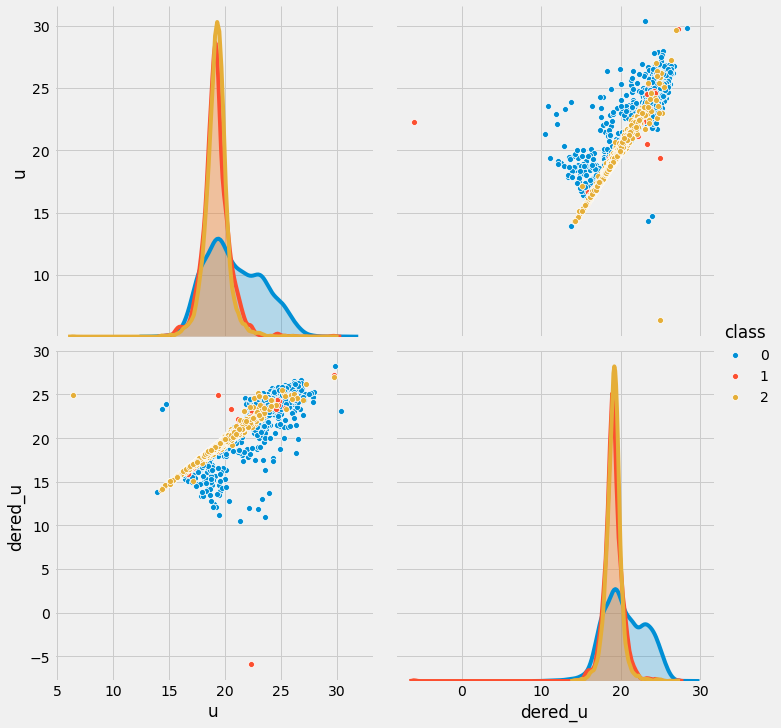

In [6]:
sns.pairplot(trn.sample(n=10000), vars=['u', 'dered_u'], hue='class', size=5)


# x,y 선정 하기. 
# 독립변수와 종속 변수를 설정하는 과정이다. 
# 독립 변수 x 에는 u 를 설정하고
# 종속 변수 y 에는 dered_U 를 설정 하였다.
# trn[trn['class'] !=0][['u']].values
에서, class =0 인 데이터들은 제외 시켰다. 왜냐하면, 위에서 보면 알듯이 파랑색 (class=0 ) 을 보면 선형성을 표현하기에는 부적절하기 때문이다. 
이렇게, 조건문으로 데이터를 선택하는 것이 가능하다. 

In [7]:
X = trn[trn['class'] != 0][['u']].values
y = trn[trn['class'] != 0]['dered_u'].values
print(X.shape, y.shape)


(200004, 1) (200004,)


# RMSE 손실 함수 정의!!!
슬라이드 에서는 Mean-sqrt-error 를 사용했었는데, 실제로는 
rout-mean-sqrt-error 를 사용한다. 왜냐하면, 루트를 씌워주면 scale 이 같아 지게 되기 때문이다. 
해석하기가 편하기 때문에 실전에서는 루트 민 스퀘어 에러를 만힝 사용하게 된다. 
mean-sqrt-error 에서는 값 자체가 
# 제곱을 해서 얻은 값
이기 때문에 루트를 씌움으로써 스케일이 같게 되는 것이다. 
# rmse = lambda y, p: np.sqrt(np.mean((y-p) ** 2))
분석을 해보자. 
sqrt , (mean, (y-p)=error **2 의 제곱) 인 꼴인 것이다. 
# lambda 함수. 
원래 함수를 정의할 때는 def rmse 를 사용한다. 
def rmse(y,p):
    return np.sqrt(np.mean((t-p) **2))
    이렇게 표현이 가능하지만, lambda 를 사용하게 되면 한줄로 표현이 가능해서 이것을 사용한다. 


In [8]:
# def rmse(y,p):
#     return np.sqrt(np.mean((t-p) **2))

In [9]:
rmse = lambda y, p: np.sqrt(np.mean((y-p) ** 2))

# numpy 를 이용하여 선형 회기를 해보자.
# 선형 회기 모델에서, 우리는 독립 변수를 u 하나만 잡았기 때문에, H(x)=0+01x1 이 것만 사용하면 되는 것이다. 
# alpha, theta0,theta1 을 설정해 주고, epoch 는 반복 하는 횟수 이다. 
전체 샘플을 4번 반복을 해서 이 값들을 계산하겠다. 이런 뜻이다. 

In [10]:
alpha = .001
theta0 = .1
theta1 = .1
epoch = 4

# flatten 이라는 함수를 통해서 2 차원을 1차원으로 변경할 것이다. 
X = trn[trn['class'] != 0][['u']].values

y = trn[trn['class'] != 0]['dered_u'].values

print(X.shape, y.shape)

의 결과 값으로, (2000004,1) (2000004,) 가 나왓다. 
    앞에 있는 값은 x 의 shape 에 대해서 설명을 한 것인데, row, column 이다. 
    column 을 없애 주게 된다. 


In [11]:
x = X.flatten()
print(x.shape)

(200004,)


# 이제 1차원 vector 로 바뀐 것이다. 
# 경사 하강법 을 적용하기 위해서는 theta 값들을 정의 해야되고, 모델의 h(x) =prediction(p_i ) 로 진행이 되는 것이다. 
# Theta0 는 상수 이기 때문에 input 값이 없고, 
# theta1 은 뒤에 x 가 들어가게 되는 것이다. x_i 

In [12]:
rmses = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(x, y):
        p_i =  theta0 + theta1 * x_i
        theta0 = theta0 + alpha * (y_i - p_i)
        theta1 = theta1 + alpha * (y_i - p_i) * x_i
    rmses.append(rmse(y, theta0 + theta1 * x))

In [13]:
theta1, theta0

(0.9362306162023849, 1.1088813148478316)

# 첫번째 epoch, 2 epch, 3 epoch, 4 epoch 값이 다. 
값이 점점 줄어 드는 것을 확인 할수 있다. 

In [14]:
rmses 

[0.25618215910731906,
 0.25492967552380746,
 0.25461791287963526,
 0.25454708923095914]

# 그래프로만 봐도 값이 줄어 드는 것을 확인 할수 잇따. 

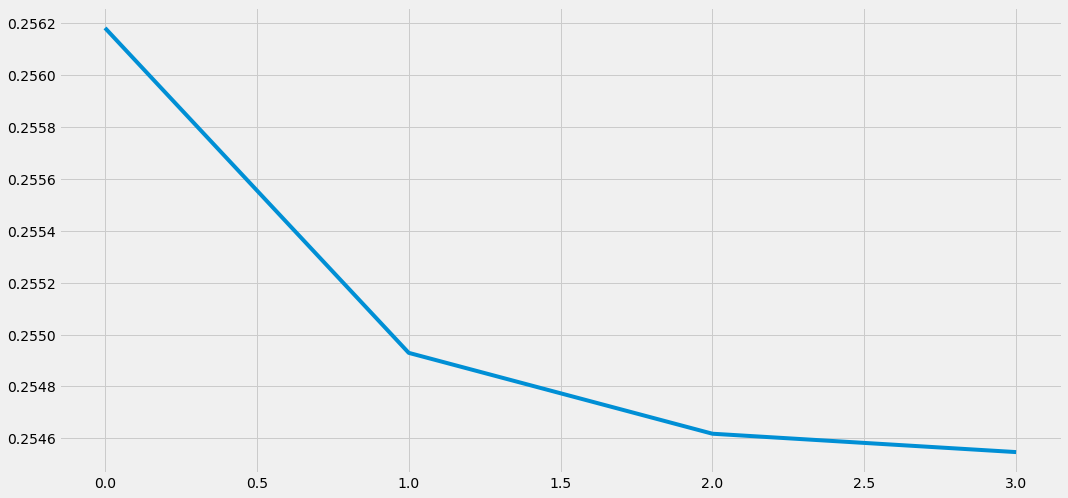

In [15]:
plt.plot(rmses)

# 실제 값과 예측값을 그래프로 그린 것이다. 
# 파랑 값이 실제 값이다. 
dered_u 와 u 에 대해서 경사 하강법을 통해서 선형 회귀 계수를 구한 값을 보면 ( orange) 이게 예측값인 것이다. numpy 를 이용해서 선형 회귀를 적용해 본 예제 이다. 
실제로는 numpy 로 알고리즘을 직접 구현 할 필요가 없다. 
# 왜냐하면 sciki-learn 이 있기 때문이다.!!!!!

Text(0.5, 0, 'u')

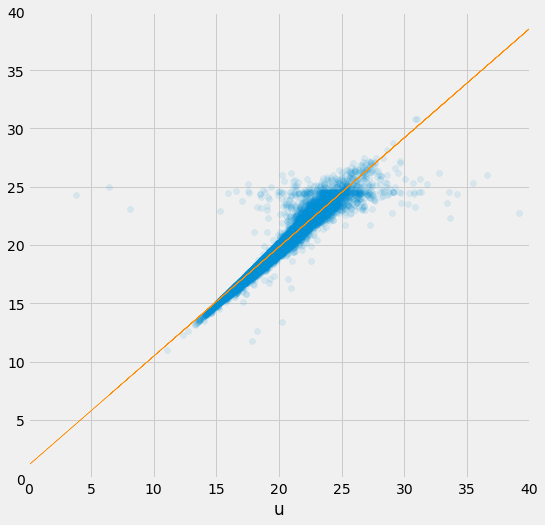

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(X,y,alpha= .1)
plt.plot(X, theta0 +theta1 * x, color='darkorange',linewidth=.5)
plt.xlim(0,40)
plt.ylim(0,40)
plt.xlabel('u')
#plt.ylabel('dered_u')

# scikit-learn 을 이용한 선형 회귀
라이브러리를 통해서 import 를 하자. 
# lr=linearRegression()
# lr.fit(x,y) 을 이요하면 학습을 하는 것이다. 앞서 지정한 x,y 값을 이용해서 학습을 하고, 
# p=lr.predict(x) 예측을 하면 p 에다가 값을 넣게 되는 것이다. 

In [17]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X,y)
p = lr.predict(X)

# 아까 epoch =4 번 실행하면서 한 값은,  0.25454708923095914 이다. 지금은 한번에 더 적은 예측값을 내 놓았다. 더 효율 적이고 빠르다는 의미이다. 
scikitlearn 짱짱


In [18]:
rmse(y,p)

0.2522450693360897

# 아까 numpy 를 이용한 theta0,1 값과 
lr.coef, lr.intercept 값이 상당히 유사하다.

In [19]:
lr.coef_, lr.intercept_

(array([0.9320425]), 1.1556424178625164)

Text(0, 0.5, 'dered_u')

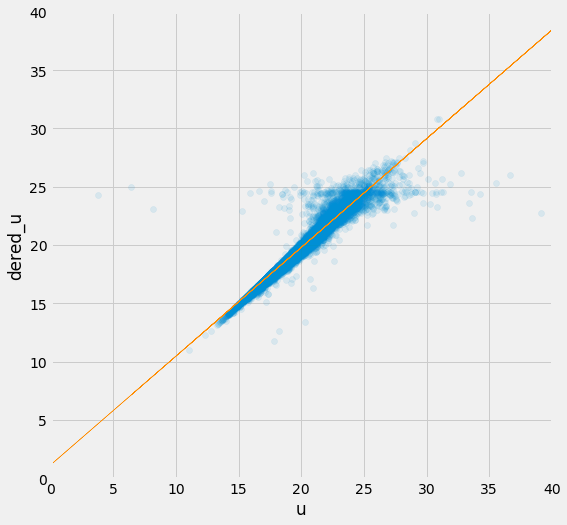

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, p, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

# scikit-learn 을 이용한 로지스틱 회귀

# 우리 대회에서 사용하는 종속 변수인 class 를 종속 변수로 두고, 그 나머지들은 다 독립 변수로 설정을 한 것이다. 
# 대회와 굉장히 유사하지만, 차이점은, multiclass classification 이다. 우리는 0,1 이 아니라, 0,1,2 여서 일단은 2개의 범주만 예측 하는 것으로 하겠다. 
# 범주가 1 이거나 2 이거나 를 예시로 드는 것이다.   

In [21]:
X = trn[trn['class'] != 0].drop('class', axis=1)
y = trn[trn['class'] != 0]['class'].values - 1


In [22]:
np.unique(y)

array([0, 1])

# import 를 하고, log_loss, 도 쓰고, auc_score 이라는 메트릭스를 많이 사용한다. 

# fit 이라는 함수를 통해서 학습을 하게 된다. 
# 예측을할 때는 , linear regression 할 때는 그냥 Predict 함수를 사용했지만, logistic 
# 처럼 범주형을 사용할 때는 predict 을 사용하면, label 을 예측하는 class 를 내놓는다. 하지만, 확률 값을 얻고 싶으면, predict_proba라는 함수를 사용해야된다. 
# p=lr.predict_prba(X) [:,1]
# return 값이 2 demensional 한 matrix 가 numpy array 가 되는데, 각각의 class 1,2 에 속한 확률이 예측값으로 지정이 된다. 그 중에서 class 2 ,뒷쪽 클래스에 속할 확률을 p 에 저장한 것이다. 

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr = LogisticRegression()
lr.fit(X, y)
p = lr.predict_proba(X)[:, 1]

In [24]:
lr.coef_, lr.intercept_

(array([[ 0.64872808,  0.19008011, -2.02565868,  0.44448453, -0.7786018 ,
         -2.01115971,  2.47459474,  0.04473306, -1.39178086,  0.79018407,
         -0.58172371,  0.10497319, -0.11962227, -0.17420129, -0.17684428,
         -0.17172392, -0.17294366, -0.17550367]]),
 array([0.24428585]))

In [25]:
log_loss(y, p)

0.36462743588581903

In [26]:
roc_auc_score(y, p)

0.8756721131552987

In [32]:
#  from sklearn.metrics import roc_curve, precision_recall_curve

In [33]:
from kaggler.metrics import plot_roc_curve, plot_pr_curve

Text(0.5, 1.0, 'Precision-Recall Curve')

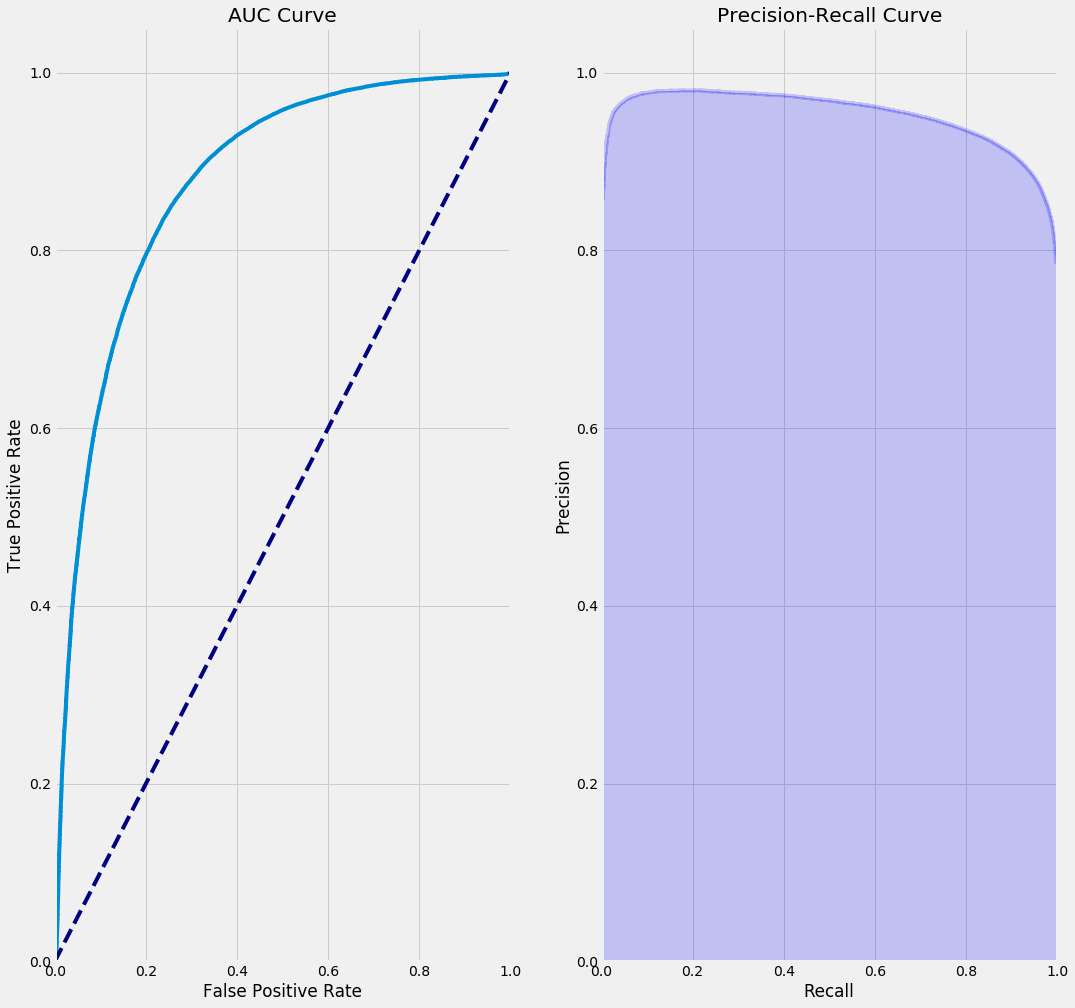

In [35]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plot_roc_curve(y, p);
plt.title('AUC Curve')
plt.subplot(1, 2, 2)
plot_pr_curve(y, p);
plt.title('Precision-Recall Curve')